<a href="https://colab.research.google.com/github/Areefahnk/18K41A0505_PE_Assignment4/blob/main/PE_Pythonassgn4_2ndques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.	Find perfect model to predict brain weight from given dataset (datasets_56097_107686_headbrain). Train the model up to 15 iterations and visualize your results.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r'/content/drive/My Drive/datasets_56097_107686_headbrain.csv')
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


**Train the model up to 15 iterations and visualize your results.**

In [25]:
er=[]
w_1=[]
w_2=[]
w_3=[]
w_0=[]
te=[]
def compute_error(W0, W1, W2, W3, x1, x2, x3, y1):
    totalError = 0
    x1 = x1
    x2 = x2
    x3 = x3
    y1 = y1
    #print(c,m)
    w_1.append(W1)
    w_2.append(W2)
    w_3.append(W3)
    w_0.append(W0)
    for i in range(0,len(x1)):
        totalError+=(((W0+W1*x1[i]+W2*x2[i]+W3*x3[i])-y1[i]) ** 2)
      #te.append(totalError)
    #print(te)
    #err=(np.array(te).sum())
    er.append(totalError/len(x1))
    #print(er)

def step_gradient(w0_current, w1_current, w2_current, w3_current, x1, x2, x3, y1, learningRate):
    w0_gradient = 0.0
    w1_gradient = 0.0
    w2_gradient = 0.0
    w3_gradient = 0.0
    N = float(len(x1))
    x1 = x1
    x2 = x2
    x3 = x3
    y1 = y1
    wg0=[]
    wg1=[]
    wg2=[]
    wg3=[]
    for i in range(0,len(x1)):
        wg0.append((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i])
        wg1.append(x1[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i]))
        wg2.append(x2[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i]))
        wg3.append(x3[i] * ((w0_current+w1_current*x1[i]+w2_current*x2[i]+w3_current*x3[i])-y1[i]))
    w0_gradient=(np.array(wg0).sum())/N
    w1_gradient=(np.array(wg1).sum())/N
    w2_gradient=(np.array(wg2).sum())/N
    w3_gradient=(np.array(wg3).sum())/N
    new_w0 = w0_current - (learningRate * w0_gradient)
    new_w1 = w1_current - (learningRate * w1_gradient)
    new_w2 = w2_current - (learningRate * w2_gradient)
    new_w3 = w3_current - (learningRate * w3_gradient)
    compute_error(new_w0,new_w1,new_w2,new_w3,x1,x2,x3,y1)
    return [new_w0,new_w1,new_w2,new_w3]

def gradient_descent_runner(x1, x2, x3, y1, starting_w0, starting_w1, starting_w2,starting_w3, learning_rate, num_iterations):
    w0 = starting_w0
    w1 = starting_w1
    w2 = starting_w2
    w3 = starting_w3
    for i in range(num_iterations):
        w0, w1, w2, w3 = step_gradient(w0, w1, w2, w3, x1, x2, x3, y1, learning_rate)
      #print(c,m)
   
def run():
    df = pd.read_csv(r'/content/drive/My Drive/datasets_56097_107686_headbrain.csv')
    z=[]
    for x in df.columns:
        z.append(x)
    data=df[z].apply(lambda rec:(rec - rec.mean())/rec.std(), axis=0)
    ds = data
    x11=ds.iloc[:,0:1]
    x22=ds.iloc[:,1:2]
    x33=ds.iloc[:,2:3]
    y11=ds.iloc[:,3:4]
    x1=np.array(x11)
    x2=np.array(x22)
    x3=np.array(x33)
    y1=np.array(y11)
    learning_rate = 0.001
    initial_w0 = 1 
    initial_w1 = 1 
    initial_w2 = 1
    initial_w3 = 1
    num_iterations = 15
    compute_error(initial_w0, initial_w1, initial_w2, initial_w3, x1, x2, x3, y1)
    gradient_descent_runner(x1, x2, x3, y1, initial_w0, initial_w1, initial_w2,initial_w3, learning_rate, num_iterations)
    


run()
a=np.arange(0,16)


**ERROR RATE VISUALIZATION WITH RESPECT TO EPOCHS**

Text(0, 0.5, 'Error')

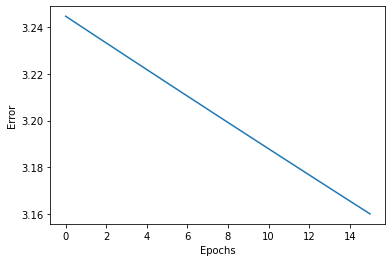

In [26]:
plt.plot(a,er)
plt.xlabel('Epochs')
plt.ylabel('Error')

**PREDICTING**

In [22]:
x1=df.iloc[:,0:1]
x2=df.iloc[:,1:2]
x3=df.iloc[:,2:3]
y1=df.iloc[:,3:4]
w0=w_0
w1=w_1
w2=w_2
w3=w_3
print(w1)
print(er)
e1=min(er)
indexopt=er.index(e1)
print(indexopt)
a=int(input('Enter Gender'))
b=int(input('Enter Age Range'))
c=int(input('Enter Head size'))
print(int(round(w1[indexopt]*a+w2[indexopt]*b+w3[indexopt]*c+w0[indexopt])))

[1, 0.9991410753543264, 0.9982831338674755, 0.9974261741530406, 0.9965701948267081, 0.9957151945062538, 0.9948611718115403, 0.9940081253645133, 0.9931560537891987, 0.9923049557116992, 0.9914548297601914, 0.9906056745649223, 0.9897574887582065, 0.9889102709744224, 0.98806401985001, 0.9872187340234669]
[array([3.24449723]), array([3.23879001]), array([3.23309539]), array([3.22741333]), array([3.2217438]), array([3.21608678]), array([3.21044223]), array([3.20481012]), array([3.19919043]), array([3.19358312]), array([3.18798817]), array([3.18240554]), array([3.17683522]), array([3.17127715]), array([3.16573133]), array([3.16019772])]
15
Enter Gender1
Enter Age Range1
Enter Head size3000
3021
